In [1]:
%run -i '../scripts/py/config.py'

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# import statsmodels.tsa 
from statsmodels.tsa.seasonal import seasonal_decompose

In [104]:
filename = GetOutputFolder()+'/AQ_combined.csv'

df = data = pd.read_csv(filename,header=0,index_col=0)

df['DATE_PST'] = pd.to_datetime(df['DATE_PST'])

df = df.dropna()

df = df[df['DATE_PST']>'2019-10-01']

df = df.reset_index
df.head()

,DATE_PST,CO,HUMIDITY,NO,NOx,O3,PM25,SO2,TEMP_MEAN,WDIR_UVEC,WDIR_VECT,WSPD_SCLR,WSPD_VECT,NO2
6551,2019-10-01 00:00,0.377,79.1,9.3,27.5,1.6,9.45,0.2,8.1,286.5,291.8,1.24,0.83,18.2
6552,2019-10-01 01:00,0.376,78.8,11.2,25.1,1.2,10.75,0.3,6.7,23.8,359.2,1.06,0.75,13.9
6553,2019-10-01 02:00,0.367,83.9,11.2,24.4,1.3,9.85,0.3,6.2,115.5,114.1,0.63,0.35,13.2
6554,2019-10-01 03:00,0.349,82.1,7.9,18.8,1.3,9.30,0.2,5.9,359.0,353.0,0.58,0.51,10.9
6555,2019-10-01 04:00,0.300,82.4,4.3,15.7,1.3,8.60,0.1,5.7,247.5,276.1,0.26,0.06,11.4


In [78]:
df.dtypes

DATE_PST     datetime64[ns]
CO                  float64
HUMIDITY            float64
NO                  float64
NOx                 float64
O3                  float64
PM25                float64
SO2                 float64
TEMP_MEAN           float64
WDIR_UVEC           float64
WDIR_VECT           float64
WSPD_SCLR           float64
WSPD_VECT           float64
NO2                 float64
dtype: object

In [84]:
df = df.set_index('DATE_PST')
df.head()

,CO,HUMIDITY,NO,NOx,O3,PM25,SO2,TEMP_MEAN,WDIR_UVEC,WDIR_VECT,WSPD_SCLR,WSPD_VECT,NO2
DATE_PST,,,,,,,,,,,,,
2019-10-01 00:00:00,0.377,79.1,9.3,27.5,1.6,9.45,0.2,8.1,286.5,291.8,1.24,0.83,18.2
2019-10-01 01:00:00,0.376,78.8,11.2,25.1,1.2,10.75,0.3,6.7,23.8,359.2,1.06,0.75,13.9
2019-10-01 02:00:00,0.367,83.9,11.2,24.4,1.3,9.85,0.3,6.2,115.5,114.1,0.63,0.35,13.2
2019-10-01 03:00:00,0.349,82.1,7.9,18.8,1.3,9.30,0.2,5.9,359.0,353.0,0.58,0.51,10.9
2019-10-01 04:00:00,0.300,82.4,4.3,15.7,1.3,8.60,0.1,5.7,247.5,276.1,0.26,0.06,11.4


In [46]:
df = df.reset_index

In [20]:
len(df)

193

In [21]:
X = df.NO2.tolist()
y = df.DATE_PST.tolist()

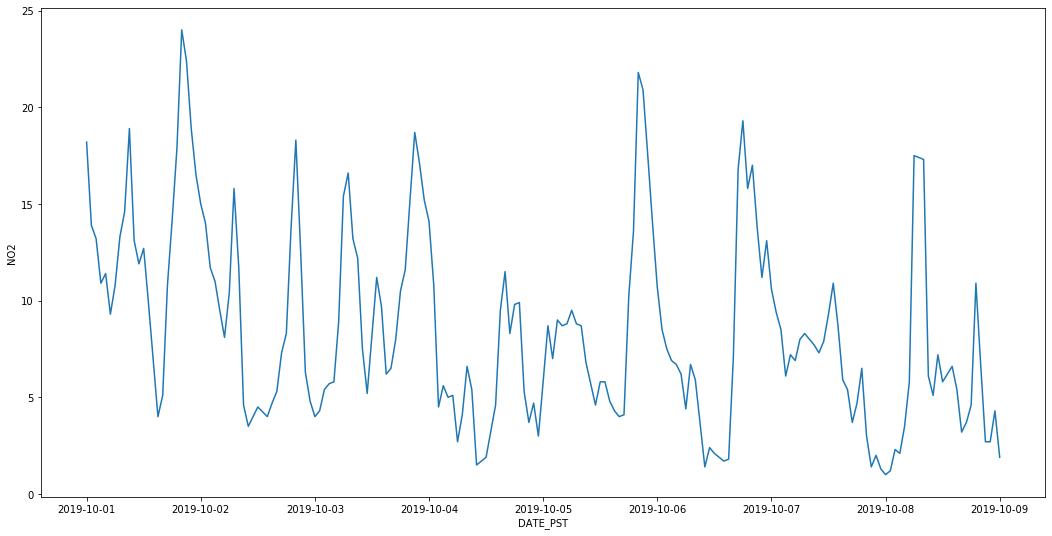

In [107]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()

sns.lineplot(x="DATE_PST", y="NO2", data=df,ax=ax)

In [97]:
y = df['NO2'].resample('MS').mean()

In [98]:
y

DATE_PST
2019-10-01    8.655495
Freq: MS, Name: NO2, dtype: float64

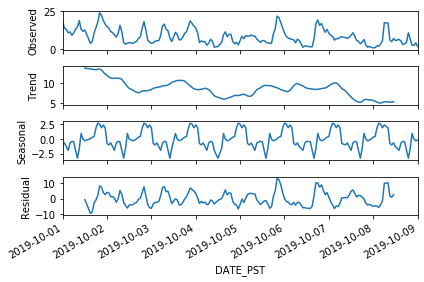

In [102]:
decomposition = seasonal_decompose(df['NO2'], model='additive',freq=24 )
fig = decomposition.plot()
plt.show()